# **Formação Cientista de Dados**
## Previsão com séries temporais 

In [1]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.graphics as smg
from pmdarima.arima import auto_arima
from datetime import datetime
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
"""
Carregamento da base de dados, conversão do atributo para data e criação da
série temporal (ts)
"""
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(
    './Data/AirPassengers.csv', parse_dates=['Month'], index_col='Month', 
    date_format=dateparse
)
data

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


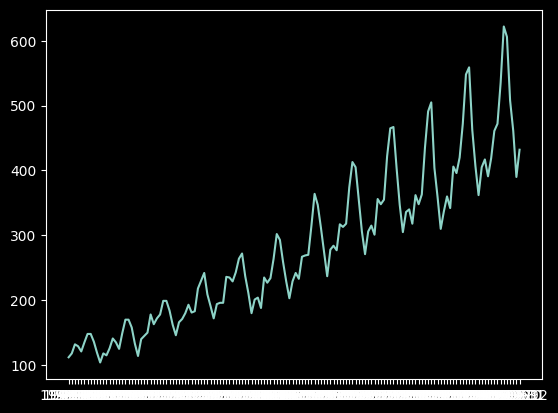

In [3]:
# Visualização da série temporal completa
plt.plot(data);

In [4]:
# Executando o auto-arima
stepwise_model = auto_arima(
    data, start_p=1, start_q=1, start_d=0, start_P=0, max_p=6, 
    max_q=6, m=12, seasonal=True, trace=True, stepwise=False
)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.09 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.27 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.07 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.23 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.65 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.15 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.28 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=2.01 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.13 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.70 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.37 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=1.83 sec
 ARIM

In [5]:
# Métrica de avaliação do modelo
print(stepwise_model.aic())

1012.9907964716265


In [6]:
# Dividindo entre treino e teste
train = data.loc['1949-01-01':'1959-12-01']
test = data.loc['1960-01-01':]
train

,#Passengers
Month,
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
...,...
1959-08,559
1959-09,463
1959-10,407


In [7]:
# Treinando o modelo
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [8]:
# Fazendo as predições
future_forecast = stepwise_model.predict(n_periods=12)
future_forecast

1960-01-01    420.489767
1960-02-01    398.145544
1960-03-01    461.598446
1960-04-01    450.378052
1960-05-01    473.705014
1960-06-01    537.563589
1960-07-01    611.897960
1960-08-01    623.264706
1960-09-01    519.851206
1960-10-01    462.014866
1960-11-01    412.644206
1960-12-01    453.472242
Freq: MS, dtype: float64

In [9]:
# Transformando em um dataframe
future_forecast = pd.DataFrame(
    future_forecast, index=test.index, columns=['#Passengers']
)
future_forecast.head()

,#Passengers
Month,
1960-02,398.145544
1960-03,461.598446
1960-04,450.378052
1960-05,473.705014
1960-06,537.563589


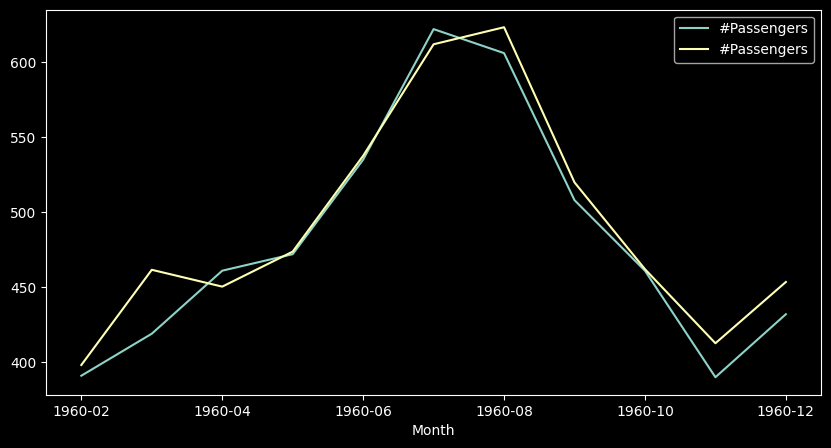

In [10]:
# azul = teste
# laranja = forecast
pd.concat([test, future_forecast], axis=1).plot(figsize=(10,5));

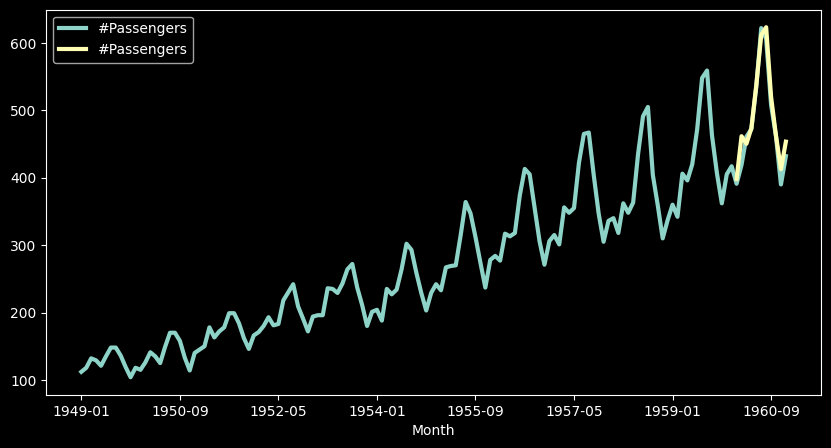

In [11]:
# azul = teste
# laranja = forecast
pd.concat([data, future_forecast], axis=1).plot(linewidth=3, figsize=(10,5));